In [ ]:
# Install the library
# %pip install pythae

In [95]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import model
import train
import lossfn
import plots
import util

In [94]:
importlib.reload(model)
importlib.reload(train)
importlib.reload(lossfn)
importlib.reload(plots)
importlib.reload(util)

<module 'util' from '/home/ikc19/PhD/Code/mdisc/mdiscnet/util.py'>

In [17]:
import torch
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
!nvidia-smi

Tue May 23 05:57:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  Off  | 00000000:1A:00.0 Off |                    0 |
| N/A   40C    P0    29W / 250W |      4MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  Off  | 00000000:1B:00.0 Off |                    0 |
| N/A   

## Dataset

In [4]:
batchsize = 128
width = 32
data = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
               transform=transforms.Compose([transforms.ToTensor(),
                                             transforms.Resize((width,width))]),
               download=True),
        batch_size=batchsize,
        shuffle=True)

torch.Size([128, 1, 32, 32])


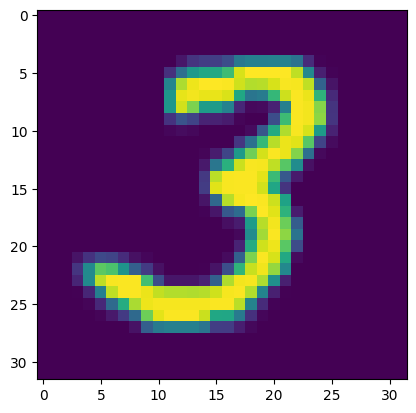

In [50]:
for x,y in data:
    x = x.to(device) # GPU
    plt.imshow(x[0].cpu().detach().numpy().squeeze())
    print(x.shape)
    break

## Model

In [155]:
from model import VAE

In [156]:
beta = 1.0
vae = VAE(image_channels=1, h_dim=64 * 1 * 1, z_dim=2, beta = beta, device=device)

## Training Pipeline

In [157]:
from train import train_model

In [158]:
output_dir='my_model'
lr=1e-3
epochs=20

In [159]:
vae = train_model(vae, data, lr=lr, epochs=epochs)

  5%|▌         | 1/20 [00:12<04:05, 12.93s/it]

Epoch: 1/20, Loss: 46.8386


 10%|█         | 2/20 [00:25<03:47, 12.66s/it]

Epoch: 2/20, Loss: 41.7403


 15%|█▌        | 3/20 [00:38<03:40, 12.98s/it]

Epoch: 3/20, Loss: 40.4450


 20%|██        | 4/20 [00:51<03:23, 12.74s/it]

Epoch: 4/20, Loss: 43.7233


 25%|██▌       | 5/20 [01:03<03:09, 12.63s/it]

Epoch: 5/20, Loss: 42.9115


 30%|███       | 6/20 [01:16<02:57, 12.67s/it]

Epoch: 6/20, Loss: 44.4642


 35%|███▌      | 7/20 [01:28<02:42, 12.52s/it]

Epoch: 7/20, Loss: 37.8550


 40%|████      | 8/20 [01:40<02:29, 12.47s/it]

Epoch: 8/20, Loss: 37.0498


 45%|████▌     | 9/20 [01:53<02:16, 12.39s/it]

Epoch: 9/20, Loss: 39.3216


 50%|█████     | 10/20 [02:05<02:03, 12.40s/it]

Epoch: 10/20, Loss: 39.7314


 55%|█████▌    | 11/20 [02:17<01:51, 12.42s/it]

Epoch: 11/20, Loss: 39.8957


 60%|██████    | 12/20 [02:30<01:39, 12.45s/it]

Epoch: 12/20, Loss: 36.2080


 65%|██████▌   | 13/20 [02:42<01:26, 12.41s/it]

Epoch: 13/20, Loss: 37.6974


 70%|███████   | 14/20 [02:55<01:14, 12.46s/it]

Epoch: 14/20, Loss: 37.7407


 75%|███████▌  | 15/20 [03:07<01:02, 12.40s/it]

Epoch: 15/20, Loss: 37.9091


 80%|████████  | 16/20 [03:20<00:49, 12.42s/it]

Epoch: 16/20, Loss: 37.1756


 85%|████████▌ | 17/20 [03:32<00:37, 12.40s/it]

Epoch: 17/20, Loss: 38.4783


 90%|█████████ | 18/20 [03:44<00:24, 12.37s/it]

Epoch: 18/20, Loss: 38.1731


 95%|█████████▌| 19/20 [03:57<00:12, 12.41s/it]

Epoch: 19/20, Loss: 35.8533


100%|██████████| 20/20 [04:09<00:00, 12.49s/it]

Epoch: 20/20, Loss: 36.7444


In [160]:
# save the model    
from util import save_model, load_model
save_model(vae, model_path=f'./my_model/vae_beta={beta}.pth')
#vae = load_model(vae, model_path='./my_model/vae.pth')

## Plot latent vectors
Let’s plot the latent vector representations of a few batches of data.

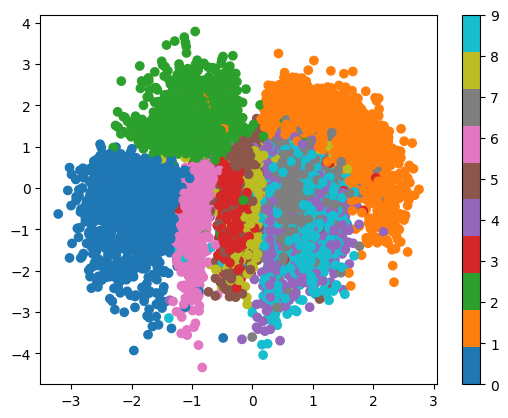

In [164]:
from plots import plot_latent
plot_latent(vae, data)

## Visualizing reconstructions

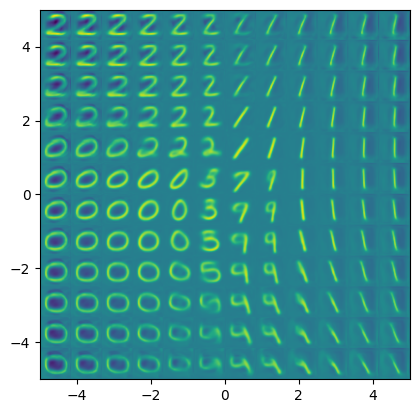

In [165]:
from plots import reconstruct, plot_reconstructed
plot_reconstructed(vae, width=32, z0=(-5, 5), z1=(-5, 5), n_img=12)

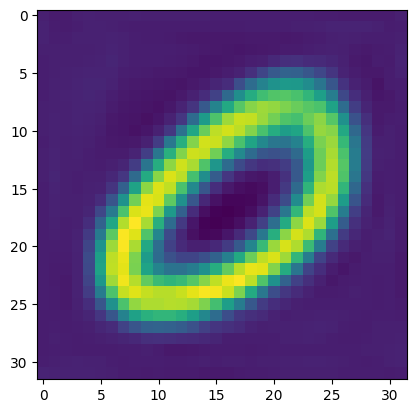

In [167]:
reconstruct(vae.eval(), x_2, width)

## Visualizing interpolations

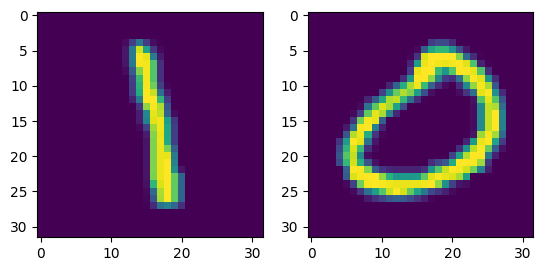

In [169]:
for x,y in data:
    x_1 = x[y == 1][1].unsqueeze(dim=1).to(device) # find a 1
    x_2 = x[y == 0][1].unsqueeze(dim=1).to(device) # find a 0
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(x_1.cpu().detach().numpy().squeeze())
    ax[1].imshow(x_2.cpu().detach().numpy().squeeze())
    break

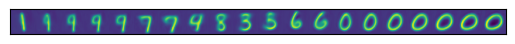

In [170]:
from plots import interpolate, interpolate_gif
interpolate(vae.eval(), x_1, x_2, width, n_img=20)

In [176]:
interpolate_gif(vae, width, "vae", x_1, x_2)